## Сорокин Вадим, 828

# Лабораторная работа 2.1

Опыт Франка-Герца

In [2]:
import numpy as np
import scipy as sp
import scipy.optimize
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import splev, splrep
from scipy.interpolate import UnivariateSpline
import scipy.optimize 
from IPython.display import Image


## Описание 

Методом электронного возбуждения измеряется
энергия первого уровня атома гелия в динамическом и статическом
режимах.

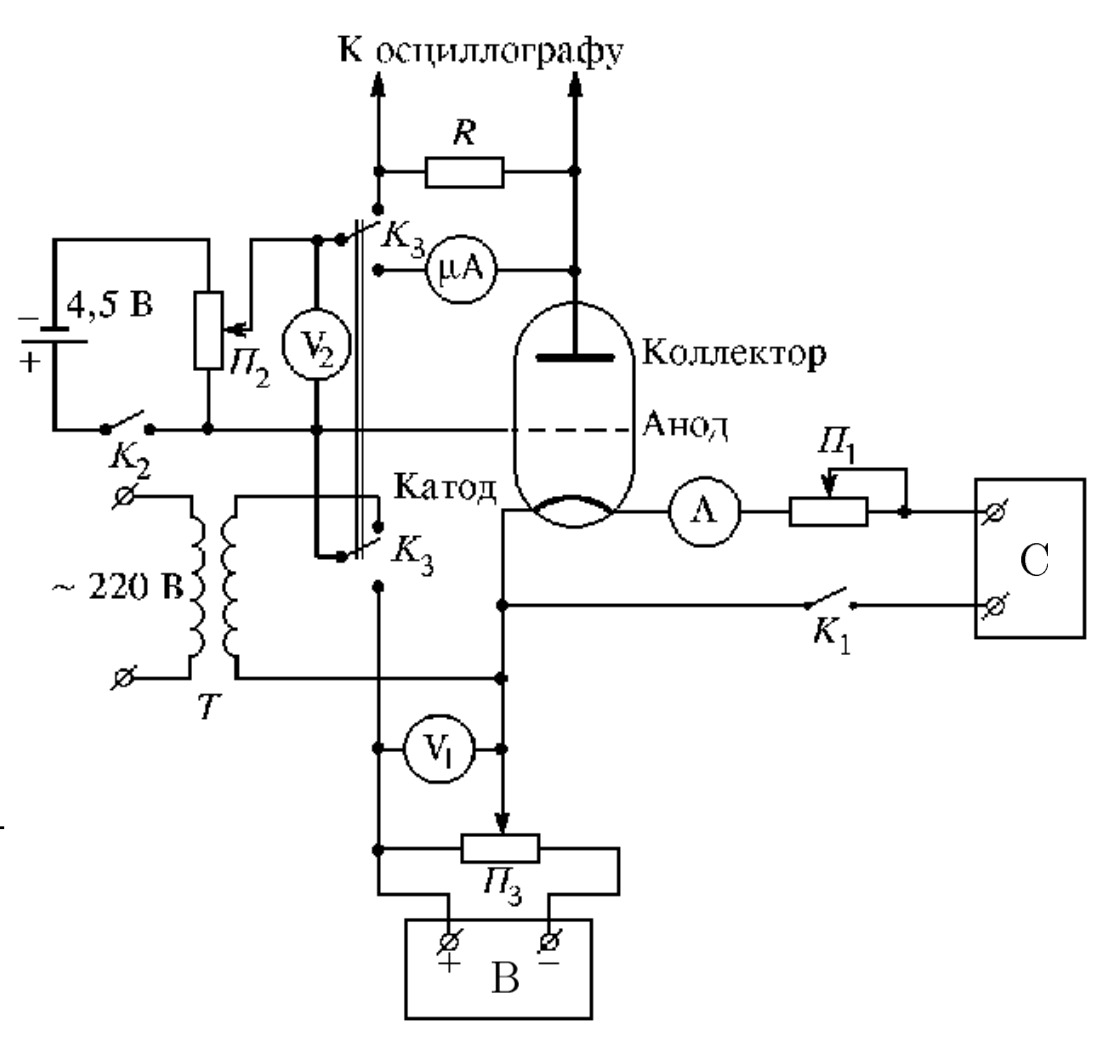

In [3]:
Image(filename='./scheme.png', width=400) 

## Динамический режим 

Снимем осциллографом сигнал с резистора при различных задерживающих напряжениях $V_i [V]$ , при этом на экране
наблюдается вольтамперная характеристика лампы.

Масштаб:

\begin{itemize}
\item $V_a: \text{  } 5 В/дел$
\item $I_k: \text{  } 5 мВ/дел$
\end{itemize}



### $V_1 = 4 V $:

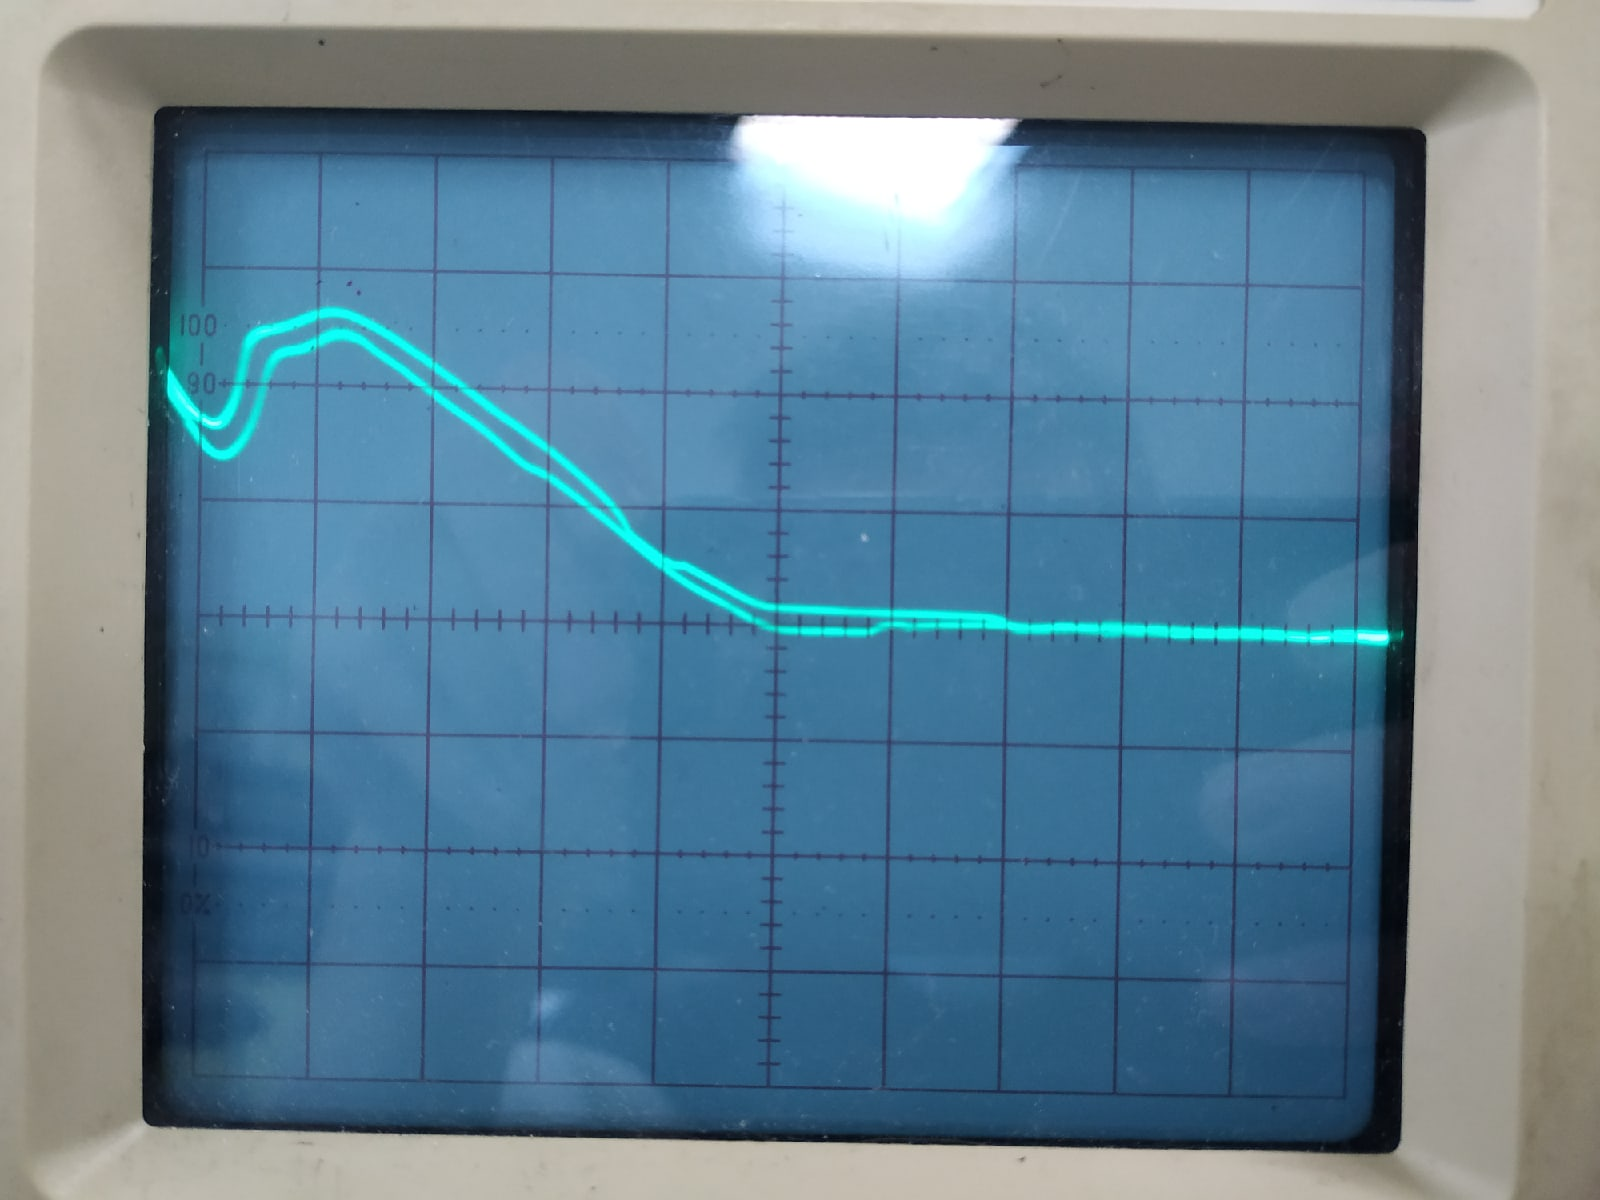

In [4]:
Image(filename='./4.jpg', width=400) 

### $V_2 = 6 V $:

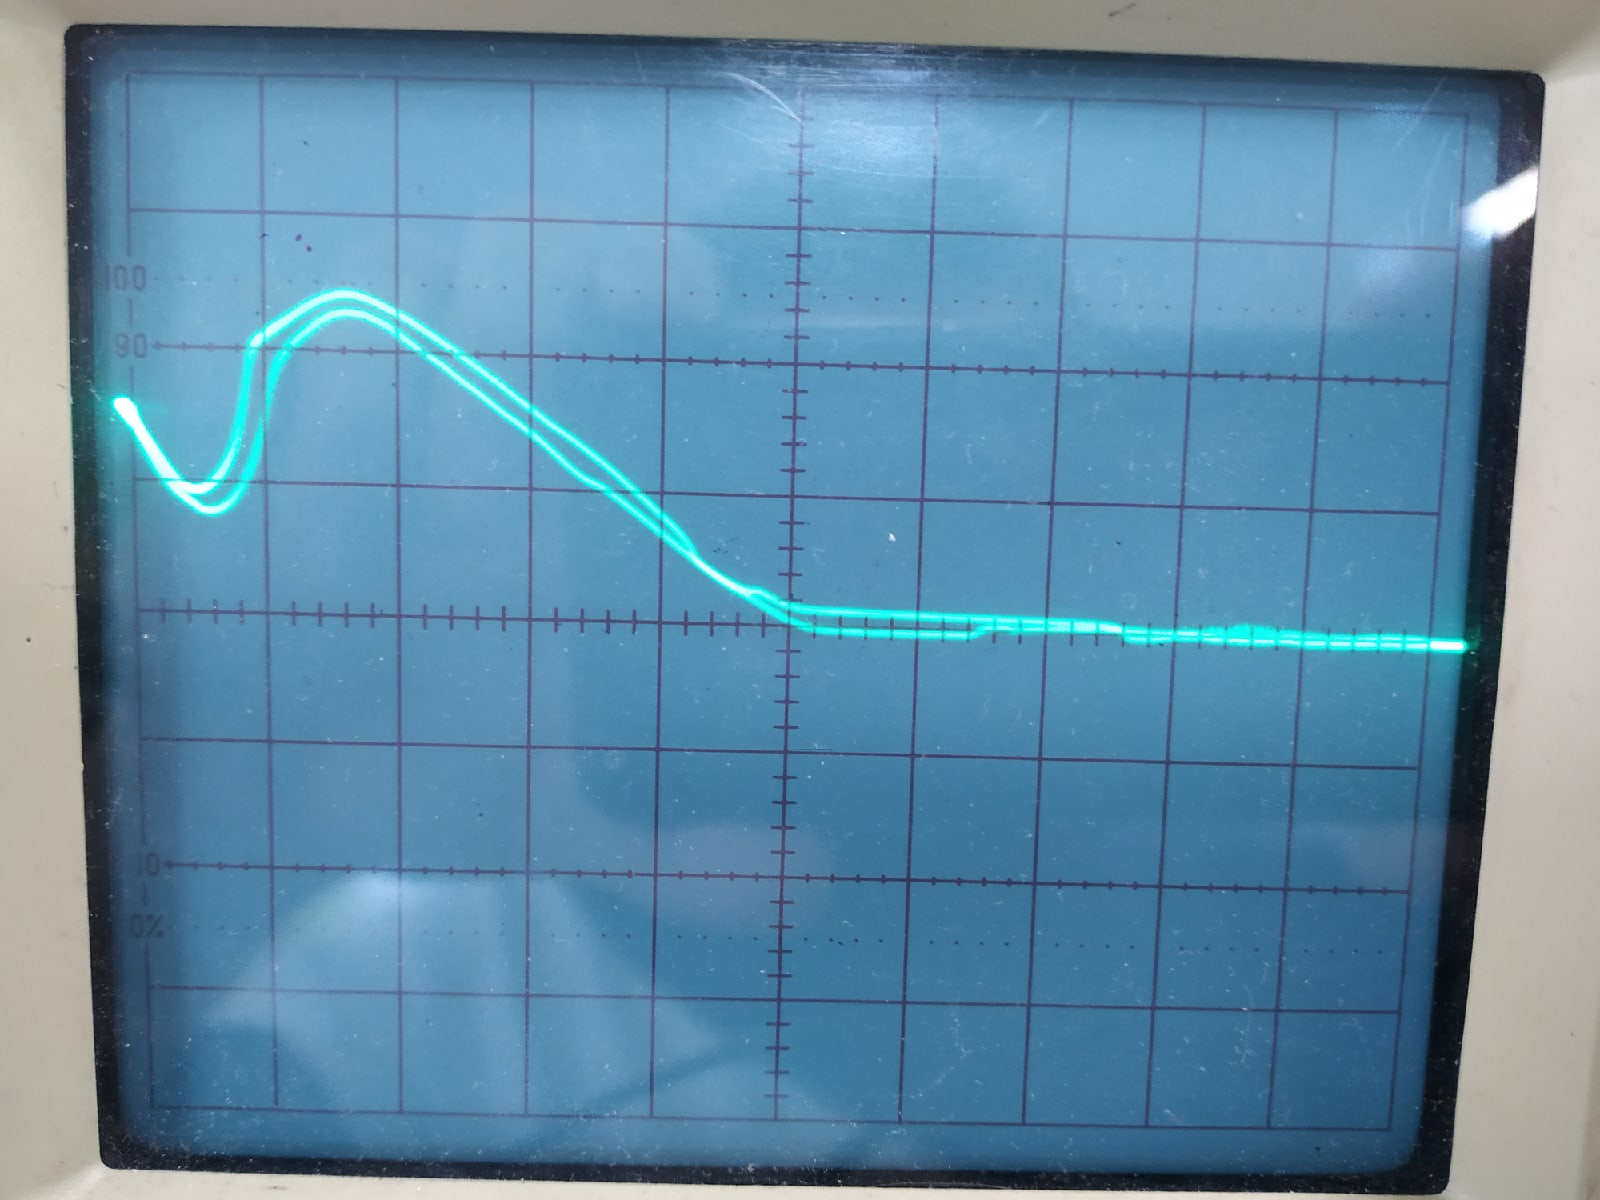

In [5]:
Image(filename='./6.jpg', width=400) 

### $V_3 = 8 V $:

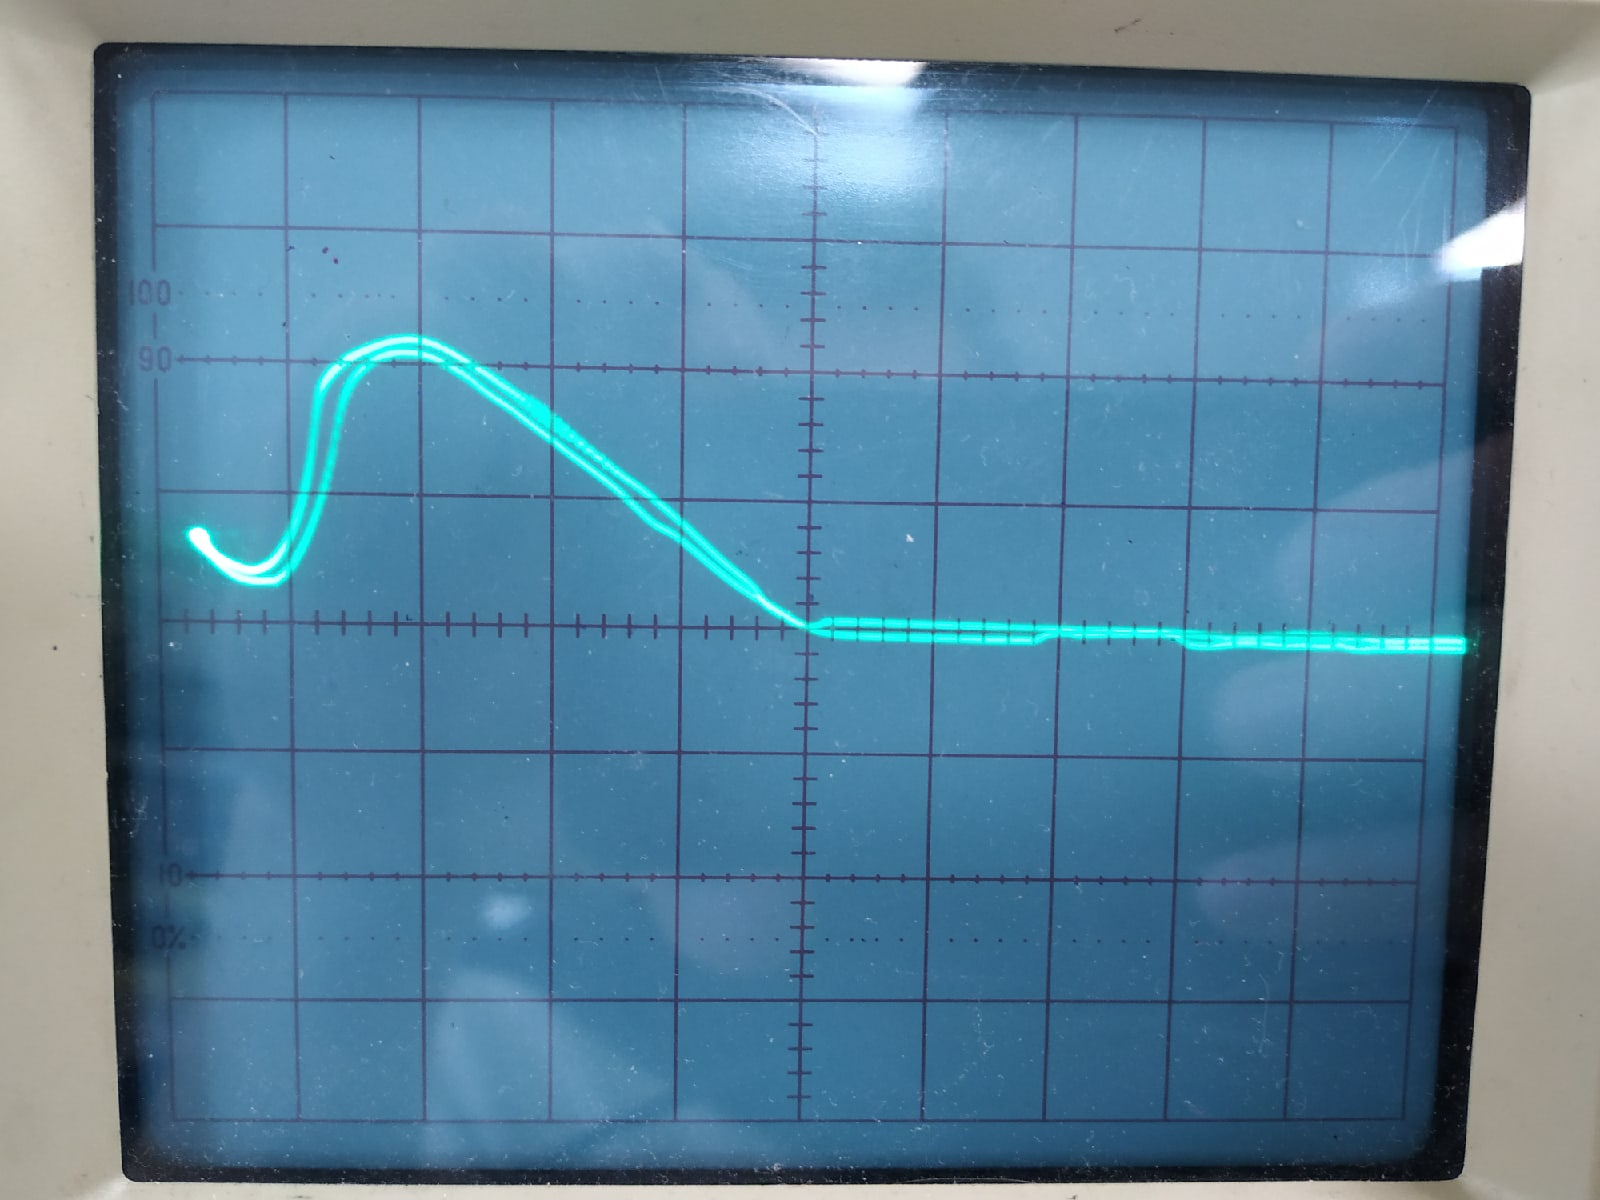

In [6]:
Image(filename='./8.jpg', width=400) 

## Статический режим 

Статический режим. Включим в цепь батарею КБСЛ, и снимем зависимость при различных задерживающих напряжениях $V_i [V]$

### $V_1 = 4 V $:

In [7]:
# данные + сплайн
V_a = np.array([0.04, 2.82, 5.94, 8.42, 11.86, 15.02, 18.04, 21.16, 19.88, 17.19, 16.84, 19.19, 23.03, 22.12, 22.54, 24.33, 25.25, 25.55, 27.13, 29.41, 32.33, 35.20, 38.10, 36.22, 37.88, 36.80, 39.27, 40.41, 42.17, 46.07, 45.40, 44.50, 41.70, 47.26, 50.42, 52.52, 55.47, 58.20, 60.09])
I_k = np.array([0, 3, 7, 10, 15, 19, 22, 21.1, 22, 21.5, 21, 22.5, 14, 19, 15.5, 13.5, 15, 16, 19, 24, 30, 36, 37, 38, 37, 37.5, 37, 35, 32.5, 32, 32, 32, 33, 33, 36, 38, 42, 45, 47])

k = V_a.argsort() 
 
x = V_a[k]
y = I_k[k]

spl = UnivariateSpline(x, y)
spl.set_smoothing_factor(5)



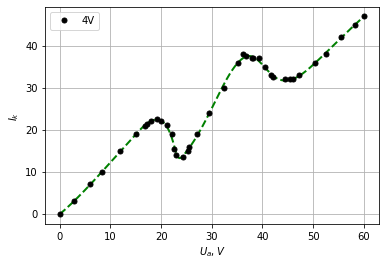

In [8]:
# график 
xs = np.linspace(0, 60, 1000)
plt.plot(xs, spl(xs), 'g--', lw=2)
plt.grid()
plt.plot(x, y, 'ko', ms=5, label='4V')

plt.xlabel('$U_a, V$')
plt.ylabel('$I_k, muA$')
plt.legend()


In [9]:
# Определение первых двух максимумов 

V_max1, V_max2 = (sp.optimize.fmin(lambda x: -spl(x), 20),
                            sp.optimize.fmin(lambda x: -spl(x), 40))




Optimization terminated successfully.
         Current function value: -22.421538
         Iterations: 16
         Function evaluations: 32
Optimization terminated successfully.
         Current function value: -37.574999
         Iterations: 17
         Function evaluations: 34


In [10]:
df = pd.DataFrame({'$V_i, V$': 4, 
                '$V_{max1}, V$': V_max1,
             '$V_{max2}, V$': V_max2}) 

In [11]:
df

,"$V_i, V$","$V_{max1}, V$","$V_{max2}, V$"
0,4,19.059326,37.399292


### $V_2 = 6 V $:

In [12]:
V_a = np.array([0.04, 3.24, 7.72, 12.52, 16.12, 16.73, 17.88, 18.77, 21.88, 20.07, 22.55, 22.68, 21.90, 21.16, 22.78, 23.51, 25.04, 23.52, 23.95, 26.01, 26.62, 27.81, 29.47, 30.75, 33.10, 34.01, 35.05, 35.75, 39.91, 39.70, 39.35, 
                38.55, 40.42, 43.65, 48.13, 44.30, 42.91, 51.12, 49.84, 55.58, 54.07, 58.64, 65.83, 59.90, 68.45, 72.26])

I_k = np.array([0, 1.5, 7, 14, 18, 19, 20, 21, 20.50, 21, 18, 14, 19, 20, 13, 9, 7, 9, 8, 8, 9, 12, 16, 
                19, 24, 26, 28, 30, 29, 29.5, 30, 30.5, 28, 24, 23, 24, 25, 25, 24, 30, 28, 33, 35, 34, 34.5, 35])

k = V_a.argsort() 
 
x = V_a[k]
y = I_k[k]

spl = UnivariateSpline(x, y)
spl.set_smoothing_factor(10)



In [13]:
# Определение первых двух максимумов 

V_max1, V_max2 = (sp.optimize.fmin(lambda x: -spl(x), 20),
                            sp.optimize.fmin(lambda x: -spl(x), 40))


df2 = pd.DataFrame({'$V_i, V$': 6, 
                '$V_{max1}, V$': V_max1,
             '$V_{max2}, V$': V_max2})  

df = df.append(df2)



Optimization terminated successfully.
         Current function value: -20.931950
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: -30.358781
         Iterations: 17
         Function evaluations: 34


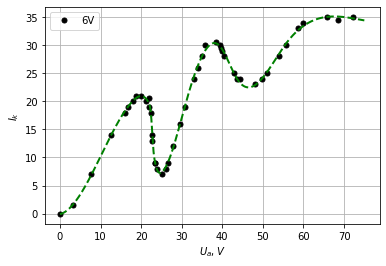

In [14]:
xs = np.linspace(0, 75, 1000)
plt.plot(x, y, 'ko', ms=5, label='6V')
plt.plot(xs, spl(xs), 'g--', lw=2)
plt.grid()

plt.xlabel('$U_a, V$')
plt.ylabel('$I_k$')
plt.legend()

In [15]:
df 

,"$V_i, V$","$V_{max1}, V$","$V_{max2}, V$"
0,4,19.059326,37.399292
0,6,19.971741,38.037903


### $V_3 = 8 V $:

In [16]:
V_a = np.array([0.04, 7.97, 11.76, 15.57, 17.81, 19.30, 22.09, 22.74, 23.02, 23.56, 24.73, 26.34, 27.52, 28.10, 30.10, 23.24, 34.62, 35.74, 36.27, 38.24, 40.11, 41.39, 46.17, 49.43, 45.37, 53.09, 55.26, 58.33, 62.29, 68.72])
I_k = np.array([0, 5, 10, 15, 18, 19, 18, 17, 12.5, 8, 4, 3, 4, 5, 10, 15, 20, 22, 23, 24, 23, 21, 16, 15, 17, 17, 19, 22, 24, 23])

k = V_a.argsort() 
 
x = V_a[k]
y = I_k[k]

spl = UnivariateSpline(x, y)
spl.set_smoothing_factor(12)





In [17]:
# Определение первых двух максимумов 

V_max1, V_max2 = (sp.optimize.fmin(lambda x: -spl(x), 20),
                            sp.optimize.fmin(lambda x: -spl(x), 40))


df2 = pd.DataFrame({'$V_i, V$': 6, 
                '$V_{max1}, V$': V_max1,
             '$V_{max2}, V$': V_max2})  

df = df.append(df2)



Optimization terminated successfully.
         Current function value: -19.442028
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: -23.746483
         Iterations: 17
         Function evaluations: 34


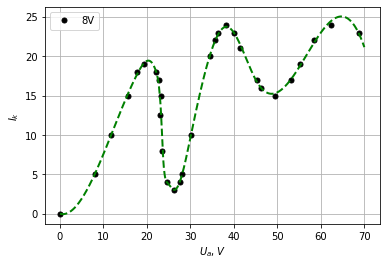

In [18]:
xs = np.linspace(0, 70, 1000)
plt.plot(x, y, 'ko', ms=5, label='8V')

plt.plot(xs, spl(xs), 'g--', lw=2)
plt.grid()

plt.xlabel('$U_a, V$')
plt.ylabel('$I_k$')
plt.legend()


In [19]:
df

,"$V_i, V$","$V_{max1}, V$","$V_{max2}, V$"
0,4,19.059326,37.399292
0,6,19.971741,38.037903
0,6,20.325256,38.268494


### Обработка результатов

По расстоянию между соседними максимумами на графиках определим энергию возбуждения 
первого уровня гелия в $eV$

In [20]:
df['$\Delta E, eV$'] = df['$V_{max2}, V$'] - df['$V_{max1}, V$'] 

In [21]:
df 

,"$V_i, V$","$V_{max1}, V$","$V_{max2}, V$","$\Delta E, eV$"
0,4,19.059326,37.399292,18.339966
0,6,19.971741,38.037903,18.066162
0,6,20.325256,38.268494,17.943237


In [36]:
Delta_v_sigma = 2 

In [37]:
Delta_v_mean_sigma = Delta_v_sigma / np.sqrt(len(df['$\Delta E, eV$']))

In [38]:
Delta_v_mean = np.mean(df['$\Delta E, eV$'])

In [39]:
Delta_v_mean_sigma

1.1547005383792517

In [40]:
Delta_v_mean_sigma / Delta_v_mean

0.06373766464795384

In [41]:
Delta_v_mean_sigma 

1.1547005383792517

Из полученых графиков найдем промежуток $\Delta V$

\begin{equation}
\Delta V = (18.0 \pm 1.0) eV
\end{equation}
